PIPELINE 5: DATASET BAN ĐẦU -> GIẢM CHIỀU -> UNSUPERVISED LEARNING -> DECISION TREES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

dfcl = pd.read_csv('../DatasetDRUL.csv')

In [2]:
dfcl.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,booking_status,dbscan_cluster,dbscan_outlier,gmm_prob_0,gmm_prob_1,gmm_prob_2
0,-1.256790,-1.523165,-1.873354,1.132156,0.531910,-1.068754,-0.631228,0.224895,0.319558,-0.877885,...,0.617230,1.123527,-0.262262,0.424917,1,0,0,4.877171e-37,0.0,1.000000e+00
1,0.675943,-0.512917,0.772726,-0.348828,2.269720,0.343788,-1.531018,-0.301709,-0.689208,-0.867273,...,-1.226787,-0.372775,0.372522,-0.462910,1,-1,1,1.885586e-30,1.0,4.284533e-14
2,-0.986511,-0.516857,1.583183,-0.437614,-1.361870,2.440143,-0.036583,-0.067734,-0.191612,-0.295945,...,1.020077,-0.655138,-0.195129,0.668014,0,1,0,4.936466e-39,1.0,8.293643e-13
3,0.037120,-0.711944,0.871477,0.497386,-0.730057,-1.031433,1.090281,-0.148144,0.148808,0.267013,...,0.811643,0.101113,-0.697189,0.212549,0,2,0,2.165731e-47,1.0,1.355065e-11
4,-0.085300,-0.766721,2.076250,-1.355237,0.473652,-0.143242,-0.675026,-0.600774,-0.014370,-1.230543,...,-0.352698,0.498974,-0.153126,0.188552,0,-1,1,1.829974e-35,1.0,2.270420e-13


Phân chia các đặc trưng và biến mục tiêu

In [3]:
y = dfcl['booking_status']
X = dfcl.drop(columns=['booking_status'])

Chia tập train/test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (29020, 20)
X_test shape: (7255, 20)
y_train shape: (29020,)
y_test shape: (7255,)


Train model

In [5]:
model = DecisionTreeClassifier(  
    max_depth=10,         
    min_samples_split=10,   
    min_samples_leaf=5,     
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

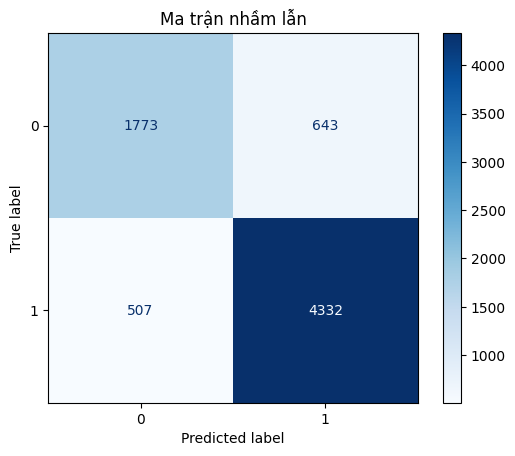

Kết quả:

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      2416
           1       0.87      0.90      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.82      0.81      0.82      7255
weighted avg       0.84      0.84      0.84      7255



In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.grid(False)
plt.show()

print("Kết quả:\n")
print(classification_report(y_test, y_pred))